# KSA206: Polar Observations and Modelling

# Week 5 - Introduction to CTDs

<div style="float: right; margin-right: 20px; margin-left: 30px; width: 30%; ; max-width: 400px">
    <img src="images/miso_path.jpg" width="100%"/>
</div>

Research ships are one of the earliest observational platforms, and continue to be one of the most important sources of data today. Ship based observations are of the highest quality and go on to calibrate observations taken with less expensive and less accurate, methods. This comes at an operational and economic cost: oceanographic voyages are extremely costly and time consuming. A lot of care and work goes onto their planning!

Australia's flagship oceanographic vessel is the RV Investigator. During this part of the course, we are going to work with data obtained in one of the Investigator's latest voyages, the [Multidisciplinary Investigations of the Southern Ocean](https://aappartnership.org.au/miso/). This was the longest voyage to date of the Investigator, lasting a total of 65 days, going from Hobart down to the Antarctic margins, then west along the slope and northwards back to Fremantle.

The scientific objectives of this voyage where many, exploring the links between physics, biogeochemistry, plankton, aerosols, precipitation and clouds. In this course we will use only observations taken by the physical oceanography team, coming from one of the staple instruments: the CTD.

#### CTD 

CTD stands for "Conductivity Temperature Depth" and refers to a collection of electronic instruments that are deployed from a ship to sample a water column in depth space. A CTD consists of three different electronic sensors:
 - A pressure sensor which measures the pressure of the water column above it. 
 - A temperature sensor.
 - A conductivity sensor, which measures how water conduces electricity, from which we can calculate the salinity of water.

The CTD is usually attached to a metal rosette, to which there are also attached a number of Niskin bottles. Niskin bottles can be closed at different depths to collect water, from which we can take samples to measure different variables. One of the most important samples is used to measure salinity directly in the lab in order to calibrate the salinity inferred by the conductivity sensor. But water can also be used to measure variables we don't have sensors for (such as [iron or other trace metals](https://aappartnership.org.au/tracing-the-metals-that-power-the-carbon-pump/)).

You can see in this [video](https://www.youtube.com/watch?v=ZYGnCW3tQd4) how the CTD is deployed from the RV Investigator. And in this [video](https://www.youtube.com/watch?v=ExTq7CwgOAg) you can see the MISO physical oceanography team powering through a couple of hours of sampling of the Niskin bottles, during just one of the 100+ CTD profiles done during the voyage!

# Exploring a CTD profile

## Load libraries and data

Python libraries are ready-to-use collections of code that make our life significantly easier. There are different libraries with different functionalities (e.g. numerical operations, plottting and visualisation). *We need to load them in order to use them.* 

The semantics to load libraries is usually:
```
import library as name_we_give_it
```
and this allows us to call functions from said `library` using the `name_we_gave_it`. For example, the library `numpy` allows us to perform matrices operations, all sorts of algebra and mathematical operations. We can load it, and then calculate the square root of a number, or the sine of another:

    import numpy as np
    np.sqrt(16)
    np.sine(90)

Let's load the libraries we will need to run this notebook.

In [1]:
# TEOS-10 library (thermodynamic equation of sea water) 
import gsw
# Plotting library
import matplotlib.pyplot as plt
# All-time-favourite library for using "labelled" data
import xarray as xr

We have our CTD profiles stored in the `data` folder. The files come in `netCDF` format, commonly used in geosciences to store multidimensional data. Let's open one file using `xarray`:

In [2]:
CTD = xr.open_dataset('data/in2024_v01010CtdAvg.nc')

Let's take a look at what `CTD` looks like:

In [3]:
CTD

<xarray.Dataset>
Dimensions:              (time: 1, pressure: 413, latitude: 1, longitude: 1)
Coordinates:
  * time                 (time) datetime64[ns] 2024-01-14T11:43:29.547003392
  * pressure             (pressure) float64 6.0 7.0 8.0 ... 416.0 417.0 417.6
  * latitude             (latitude) float64 -66.48
  * longitude            (longitude) float64 144.9
Data variables: (12/28)
    woce_date            (time) float64 ...
    woce_time            (time) float64 ...
    temperature          (longitude, latitude, pressure, time) float64 ...
    temperatureFlag      (longitude, latitude, pressure, time) float32 ...
    conductivity         (longitude, latitude, pressure, time) float64 ...
    conductivityFlag     (longitude, latitude, pressure, time) float32 ...
    ...                   ...
    transmissometer      (longitude, latitude, pressure, time) float64 ...
    transmissometerFlag  (longitude, latitude, pressure, time) float32 ...
    fluorometer          (longitude, latitude, pressure, time) float64 ...
    fluorometerFlag      (longitude, latitude, pressure, time) float32 ...
    obs                  (longitude, latitude, pressure, time) float64 ...
    obsFlag              (longitude, latitude, pressure, time) float32 ...
Attributes: (12/14)
    WOCE_Version:    3.0
    Conventions:     COARDS/WOCE/CF-1.5
    History:         Created on 07-May-2024 11:45:34
    Organisation:    CSIRO Marine Research
    Survey:          in2024_v01
    Vessel:          Unknown
    ...              ...
    StartTime:       14-Jan-2024 11:43:29
    BottomTime:      14-Jan-2024 11:53:37
    EndTime:         14-Jan-2024 12:32:12
    WaterDepth:      425.98
    MinAltitude:     Unknown
    PressureBin:     1

`CTD` is an `xarray.Dataset` that contains the following information:
1. **Dimensions**: names and lengths of the "axes" of our dataset. In this case we have: `dimensions: (time: 1, pressure: 413, latitude: 1, longitude: 1)`.

   This means that we have a time dimension of length 1 which is the date and time the profile was made; a pressure dimension of length 413, meaning 413 depths sampled, and latitude, longitude dimensions of length 1 that tell us where the CTD was taken.

2. **Coordinates**: the actual values within each dimension. We can see that this profile was taken the 14th of Jan 2024, at 66.48S, 144.9E. 

3. **Variables**: measured data from different sensors. The subscript `_2` indicate it is a secondary sensor, which acts as a failsafe in case the primary instruments fail.

4. **Attributes**: "metadata" for the profile. That usually includes who created the file, on what date, etc. Individual variables also have attributes indicating sensor used, units etc.

   For example, in the case of `temperature` below, we can see in the attributes that it is the primary temperature, in units of deg C, etc.

In [4]:
CTD['temperature']

<xarray.DataArray 'temperature' (longitude: 1, latitude: 1, pressure: 413,
                                 time: 1)>
[413 values with dtype=float64]
Coordinates:
  * time       (time) datetime64[ns] 2024-01-14T11:43:29.547003392
  * pressure   (pressure) float64 6.0 7.0 8.0 9.0 ... 415.0 416.0 417.0 417.6
  * latitude   (latitude) float64 -66.48
  * longitude  (longitude) float64 144.9
Attributes:
    long_name:      Primary Temperature
    standard_name:  Temperature
    units:          deg C (ITS-90)
    data_min:       -1.871768749280698
    data_max:       -0.7049766767733877
    valid_range:    [-10.  40.]
    manufacturer:   Sea-Bird Electronics Inc
    model:          SBE3T
    serialNo:       2751
    unitNo:         1.0

## Creating a figure of the temperature and salinity profile

Let's try a couple of ways of visualising this profile! We will start with plotting temperature and salinity, which are two of the most important oceanographic variables in this dataset, against pressure.

First, lets get create variables for temperature and salinity:

In [6]:
temperature = CTD['temperature']
salinity = CTD['salinity']

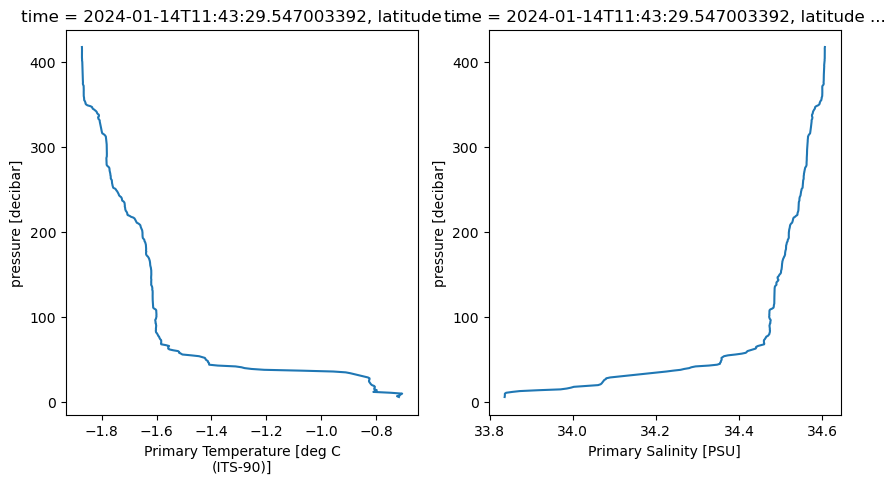

In [7]:
# Create a figure instance with two axis arranged in 1 row, 2 columns
fig, axs = plt.subplots(1, 2, figsize = (10, 5))
# Plot temperature
temperature.plot(ax = axs[0], y = 'pressure')
# Plot salinity
salinity.plot(ax = axs[1], y = 'pressure');

### Notes on the code above

This is a minimal plotting example. We can definitely make improvements! 

For example, right now the y-axis is showing larger pressures (bottom of the cast) at the top. Flipping it to have the surface at the top will make it more intuitive to read. We should also add labels to indicate what variable is represented in each x-axis, add gridlines so that it is easier to identify values at different points of the profile, change the colors, add a title with profile information, etc. 

Tweaking a figure's aspect can be one of the easiest ways to procastinate, but it can also make the difference between others understanding what you are showing or not. 

<h4 style="color: red;">Question 1</h4>

Use [CoPilot](https://copilot.microsoft.com/) to understand what each of the functions we used to plot does. You can ask what `plt.subplots(1, 2, figsize = (10, 5))` does, and how can you modify the code to have a figure with four panels (2 rows and 2 columns).

*Answer here*

## Creating a better figure

Let's improve our profile figure. We will do some aesthetic improvements, but let's also add oxygen (another very valuable measurement), and potential density. Note that potential density is not included in the `CTD` profile's available variables, but since it is a function of temperature and salinity, we can calculate it using a function from `gsw`. 

The `gsw` library is essentially a python implementation of the "thermodynamic equation of sea water", but the important thing you should remember is that it allows for many useful calculations in oceanography! We can calculate different types of key oceanographic variables (for example the ones explained in this [article](https://www.nature.com/scitable/knowledge/library/key-physical-variables-in-the-ocean-temperature-102805293/)), including density, and conversions between them. You can see all the functions available and their documentation [here](https://teos-10.github.io/GSW-Python/gsw_flat.html).

We will use the function `gsw.sigma0()`. We can use `help()` to see what it takes as input:

In [8]:
help(gsw.sigma0)

Help on function sigma0 in module gsw._wrapped_ufuncs:

sigma0(SA, CT)
    Calculates potential density anomaly with reference pressure of 0 dbar,
    this being this particular potential density minus 1000 kg/m^3.  This
    function has inputs of Absolute Salinity and Conservative Temperature.
    This function uses the computationally-efficient expression for
    specific volume in terms of SA, CT and p (Roquet et al., 2015).

    Parameters
    ----------
    SA : array-like
        Absolute Salinity, g/kg
    CT : array-like
        Conservative Temperature (ITS-90), degrees C

    Returns
    -------
    sigma0 : array-like, kg/m^3
        potential density anomaly with
        respect to a reference pressure of 0 dbar,
        that is, this potential density - 1000 kg/m^3.


    Notes
    -----
    Note that this 75-term equation has been fitted in a restricted range of
    parameter space, and is most accurate inside the "oceanographic funnel"
    described in McDougall et al. (

Our `CTD` profile containes *practical salinity*, which is not the same as *absolute salinity*. And we have *in situ tempereature* which is not the same as *conservative temperature* But not to worry! `gsw` will help us again with `gsw.SA_from_SP` and `gsw.CT_from_t`.

In [8]:
help(gsw.SA_from_SP)

Help on function SA_from_SP in module gsw._wrapped_ufuncs:

SA_from_SP(SP, p, lon, lat)
    Calculates Absolute Salinity from Practical Salinity.  Since SP is
    non-negative by definition, this function changes any negative input
    values of SP to be zero.

    Parameters
    ----------
    SP : array-like
        Practical Salinity (PSS-78), unitless
    p : array-like
        Sea pressure (absolute pressure minus 10.1325 dbar), dbar
    lon : array-like
        Longitude, -360 to 360 degrees
    lat : array-like
        Latitude, -90 to 90 degrees

    Returns
    -------
    SA : array-like, g/kg
        Absolute Salinity


    References
    ----------
    IOC, SCOR and IAPSO, 2010: The international thermodynamic equation of
    seawater - 2010: Calculation and use of thermodynamic properties.
    Intergovernmental Oceanographic Commission, Manuals and Guides No. 56,
    UNESCO (English), 196 pp.  Available from http://www.TEOS-10.org
    See section 2.5 and appendices A.4 and

In [9]:
help(gsw.CT_from_t)

Help on function CT_from_t in module gsw._wrapped_ufuncs:

CT_from_t(SA, t, p)
    Calculates Conservative Temperature of seawater from in-situ
    temperature.

    Parameters
    ----------
    SA : array-like
        Absolute Salinity, g/kg
    t : array-like
        In-situ temperature (ITS-90), degrees C
    p : array-like
        Sea pressure (absolute pressure minus 10.1325 dbar), dbar

    Returns
    -------
    CT : array-like, deg C
        Conservative Temperature (ITS-90)


    References
    ----------
    IOC, SCOR and IAPSO, 2010: The international thermodynamic equation of
    seawater - 2010: Calculation and use of thermodynamic properties.
    Intergovernmental Oceanographic Commission, Manuals and Guides No. 56,
    UNESCO (English), 196 pp.  Available from http://www.TEOS-10.org
    See section 3.3 of this TEOS-10 Manual.



In [12]:
absolute_salinity = gsw.SA_from_SP(salinity, CTD['pressure'], CTD['longitude'], CTD['latitude'])
absolute_salinity = absolute_salinity

conservative_temperature = gsw.CT_from_t(absolute_salinity, temperature, CTD['pressure'])
conservative_temperature = conservative_temperature

Now we are ready to calculate potential density referenced to the surface (`p_ref = 0`):

In [13]:
density = gsw.sigma0(absolute_salinity, conservative_temperature)
density = density.rename('density')

Let's create a figure with temperature, salinity, density and oxygen!

In [14]:
oxygen = CTD['oxygen']

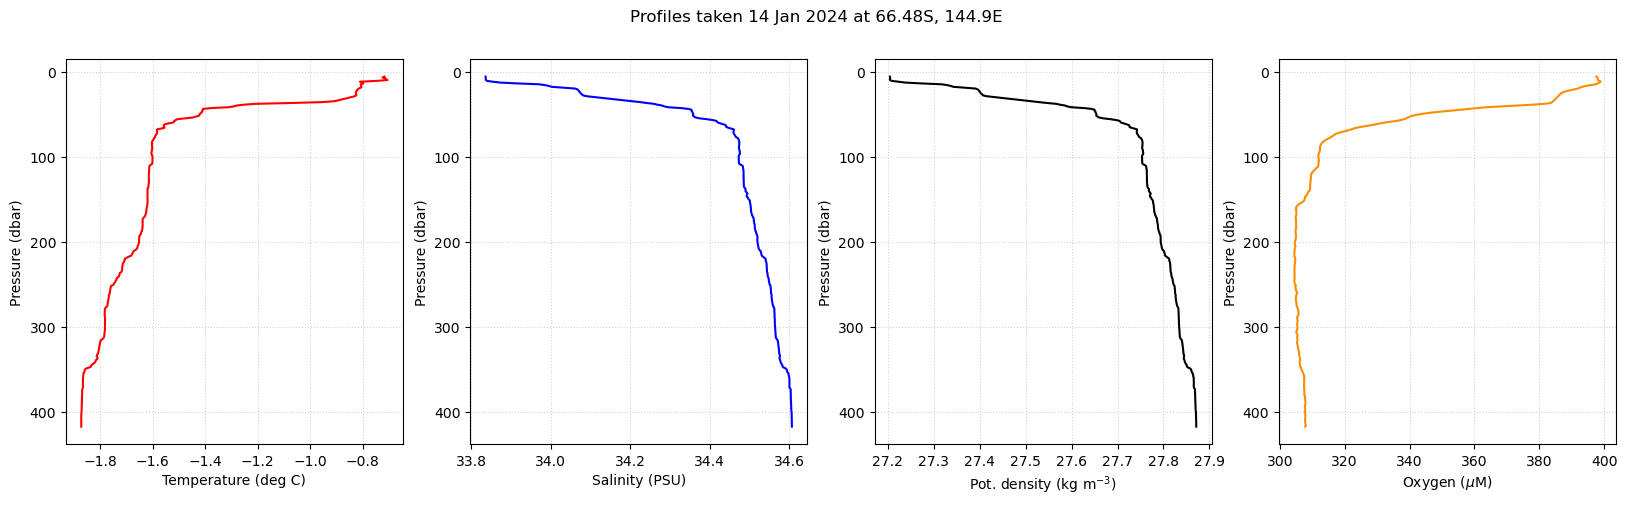

In [15]:
# Create a figure instance
fig, axs = plt.subplots(1, 4, figsize = (20,5))
# Plot temperature (in red)
temperature.plot(ax = axs[0], y = 'pressure', color = 'red', label = None)
# Plot salinity (in blue)
salinity.plot(ax = axs[1], y = 'pressure', color = 'blue')
# Plot density (in black)
density.plot(ax = axs[2], y = 'pressure', color = 'k')
# Plot oxygen (in orange)
oxygen.plot(ax = axs[3], y = 'pressure', color = 'darkorange')

# Let's iterate through the axis instead of tweaking them 1 by 1.
for ax in axs:
    ax.grid(linestyle = ':', color = 'lightgrey')
    ax.invert_yaxis()
    ax.set_ylabel('Pressure (dbar)')   
    ax.set_title('') 

# The xlabels still need to be set individually
axs[0].set_xlabel('Temperature (deg C)')
axs[1].set_xlabel('Salinity (PSU)')
axs[2].set_xlabel('Pot. density (kg m$^{-3}$)')
axs[3].set_xlabel('Oxygen ($\\mu$M)')
# Add a title
fig.suptitle('Profiles taken 14 Jan 2024 at 66.48S, 144.9E');

If you want to save the figure above, you add the following line at the bottom of the code cell:

    plt.savefig('path_to_location/name.jpg', bbox_inches = 'tight')

<h4 style="color: red;">Question 2</h4>

**a.** Discuss how "potential density" is different from "density", and what are the differences between absolute and practical salinity, and in situ and conservative temperature. Would it have been a big source of error to use the wrong types of temperature and salinity to calculate potential density? To answer this, you can try calculating density again from in-situ temperature and practical salinity, and compare the results.

**b.** Can you identify the mixed layer, thermocline and pycnocline depths in this profile? Try changing the limits of the `yaxis` to help you visualize these regions better.

*Answer here*

## Comparing the CTD profile to Niskin bottle data

The water samples collected in the Niksin bottles at different depths are used to:

 - Check the accuracy of the electronic sensors on the CTD
 - Correct biases in the sensors
 - Measure properties that can't be measured accureately with an electronic sensor (chlorophyll, trace metals, etc).

Salinity and oxygen are two variables that must be analysed in the lab to callibrate the sensors. Not temperature however, because temperature changes rapidly as the rosette moves upwards and traverses surrounding waters (the bottles are not adiabatic!).

Let's open and look at the "hydro" file (short for HydroChem which is the team that analyses water samples in the lab):

In [16]:
hydro = xr.open_dataset('data/in2024_v01Hydro010.nc')
hydro

<xarray.Dataset>
Dimensions:            (time: 1, pressure: 36, latitude: 1, longitude: 1,
                        string: 10)
Coordinates:
  * time               (time) datetime64[ns] 2024-01-14T12:34:38.082995200
  * pressure           (pressure) float64 3.3 3.4 15.1 ... 419.4 419.4 419.4
  * latitude           (latitude) float64 -66.48
  * longitude          (longitude) float64 144.9
Dimensions without coordinates: string
Data variables: (12/25)
    woce_date          (time) float64 ...
    woce_time          (time) float64 ...
    firingTime         (longitude, latitude, pressure, time) float64 ...
    firingLatitude     (longitude, latitude, pressure, time) float64 ...
    firingLongitude    (longitude, latitude, pressure, time) float64 ...
    rosettePosition    (longitude, latitude, pressure, time) float32 ...
    ...                 ...
    silicate           (longitude, latitude, pressure, time) float64 ...
    silicateFlag       (longitude, latitude, pressure, time) float32 ...
    ammonia            (longitude, latitude, pressure, time) float64 ...
    ammoniaFlag        (longitude, latitude, pressure, time) float32 ...
    nitrite            (longitude, latitude, pressure, time) float64 ...
    nitriteFlag        (longitude, latitude, pressure, time) float32 ...
Attributes:
    WOCE_Version:  3.0
    Conventions:   COARDS/WOCE/CF-1.5
    Survey:        in2024_v01
    Deployment:    10.0
    StartTime:     14-Jan-2024 11:35:26
    BottomTime:    14-Jan-2024 11:53:37
    EndTime:       14-Jan-2024 12:34:38
    Operator:      Kathy
    BottomDepth:   [416.339988 425.699987 426.789987]
    HyproVersion:  5.7

You can see that now, the pressure dimension is of length 36, because we had 36 bottles on the rosette.

<h4 style="color: red;">Question 3</h4>

If we only have 36 bottles, we need to be thoughtful about the depths we collect samples for. Keeping in mind that the main goal is to calibrate our conductivity and oxygen sensors, and looking at the profiles we plotted above, where would you have chose to sample this CTD?

*Tip: ideally, you would be able to reproduce the shape of the profile by linearly interpolating between bottles.*

*Answer here*

In [17]:
salinity_bottle = hydro['salinity']
oxygen_bottle = hydro['oxygen']

<h4 style="color: red;">Question 4</h4>

Some depths are very important, so we close **2** bottles just in case one fails and doesn't close properly, and/or we have enough litres for all the lab analysis we want. Take a look at the depths we closed bottles at. Can you identify at what regions of the water column we duplicated bottles?

In [18]:
salinity_bottle['pressure'].values

array([  3.3,   3.4,  15.1,  15.1,  15.2,  20.2,  32. ,  32.1,  32.1,
        45.1,  45.1,  45.1,  75.2,  75.2,  75.3, 100.1, 100.2, 120.1,
       120.1, 150.3, 150.3, 150.3, 200.4, 224.5, 250.3, 250.4, 300.2,
       335.3, 349.8, 349.8, 375.2, 400.3, 400.4, 419.4, 419.4, 419.4])

*Answer here*

Lets remove the duplicates:

In [20]:
salinity_bottle = salinity_bottle.drop_duplicates(dim = 'pressure')
oxygen_bottle = oxygen_bottle.drop_duplicates(dim = 'pressure')

And now plot sensor and bottle data together:

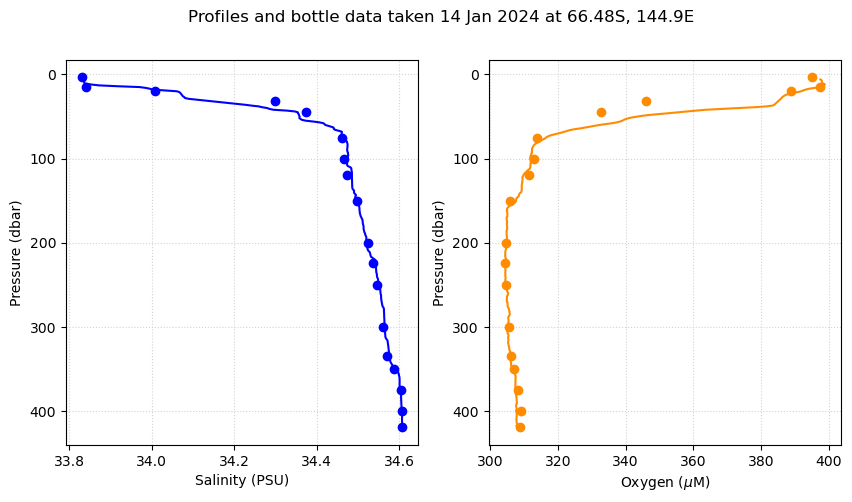

In [21]:
# Create a figure instance
fig, axs = plt.subplots(1, 2, figsize = (10,5))
# Plot sensor salinity (in blue)
salinity.plot(ax = axs[0], y = 'pressure', color = 'blue')
# Plot bottle salinity (with blue circles)
salinity_bottle.plot(ax = axs[0], y = 'pressure', color = 'none',
                     marker = 'o', markerfacecolor = 'blue', markeredgecolor = 'blue')
# Plot sensor oxygen (in orange)
oxygen.plot(ax = axs[1], y = 'pressure', color = 'darkorange')
oxygen_bottle.plot(ax = axs[1], y = 'pressure', color = 'none',
                     marker = 'o', markerfacecolor = 'darkorange', markeredgecolor = 'darkorange')

# Let's iterate through the axis instead of tweaking them 1 by 1.
for ax in axs:
    ax.grid(linestyle = ':', color = 'lightgrey')
    ax.invert_yaxis()
    ax.set_ylabel('Pressure (dbar)')    
    ax.set_title('')

# The xlabels still need to be set individually
axs[0].set_xlabel('Salinity (PSU)')
axs[1].set_xlabel('Oxygen ($\\mu$M)')
# Add a title
fig.suptitle('Profiles and bottle data taken 14 Jan 2024 at 66.48S, 144.9E');

To compare the sensor to bottle data, we can calculate the difference between bottle and sensor by subsampling the sensor profile to the bottle depths. We can do that easily using the `.sel()` function:

In [22]:
salinity_sensor = salinity.sel(pressure = salinity_bottle['pressure'], method = 'nearest')
oxygen_sensor = oxygen.sel(pressure = oxygen_bottle['pressure'], method = 'nearest')

Using `method = 'nearest'` allows us to select the nearest pressures, otherwise the levels would have to be *identical to the last the decimal*.

Now let's calculate the difference and plot:

In [23]:
salinity_difference = salinity_sensor.values - salinity_bottle
oxygen_difference = oxygen_sensor.values - oxygen_bottle

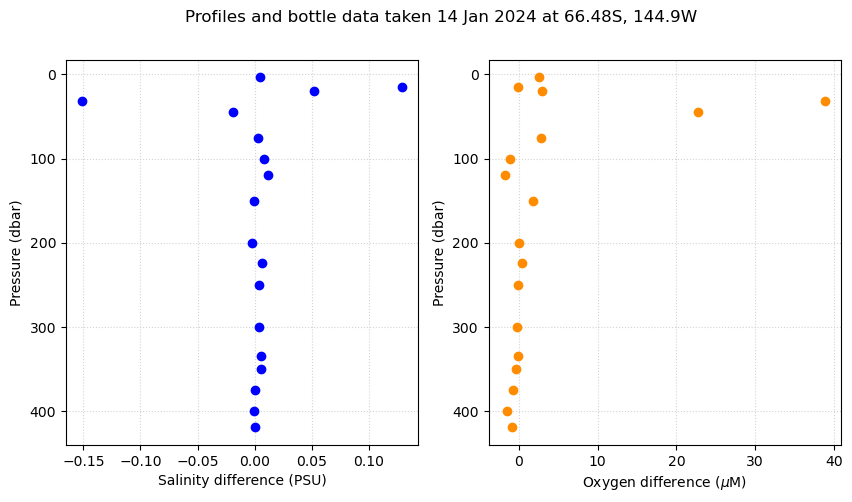

In [24]:
# Create a figure instance
fig, axs = plt.subplots(1, 2, figsize = (10,5))
# Plot salinity difference (in blue)
salinity_difference.plot(ax = axs[0], y = 'pressure', color = 'none',
                     marker = 'o', markerfacecolor = 'blue', markeredgecolor = 'blue')
# Plot sensor oxygen (in orange)
oxygen_difference.plot(ax = axs[1], y = 'pressure', color = 'none',
                     marker = 'o', markerfacecolor = 'darkorange', markeredgecolor = 'darkorange')

# Let's iterate through the axis instead of tweaking them 1 by 1.
for ax in axs:
    ax.grid(linestyle = ':', color = 'lightgrey')
    ax.invert_yaxis()
    ax.set_ylabel('Pressure (dbar)')   
    ax.set_title('') 

# The xlabels still need to be set individually
axs[0].set_xlabel('Salinity difference (PSU)')
axs[1].set_xlabel('Oxygen difference ($\\mu$M)')
# Add a title
fig.suptitle('Profiles and bottle data taken 14 Jan 2024 at 66.48S, 144.9W');

<h4 style="color: red;">Question 5</h4>

Looking at the plot above, you can see that the difference between sensor and bottle data seems larger at the surface. Can you think of a reason why?

*Answer here*

<h4 style="color: red;">Question 6</h4>

You can see in the `CTD` file that we have data from 2 sensors for each variable. Make a plot comparing both sensors.

*Tip: this can either be profiles with both sensors on the same axis, a plot of the difference between sensors, a plot of sensor 1 vs sensor 2, etc.*

Don't be afraid of using [CoPilot](https://copilot.microsoft.com/)!

*Answer here*